**Monte Carlo**

In [126]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

In [110]:
df = wb.DataReader('^SPX', data_source='stooq', start='2010-1-1', end='2023-12-31')
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-29,4782.88,4788.43,4751.99,4769.83,1.742503e+09
2023-12-28,4786.44,4793.30,4780.98,4783.35,1.482519e+09
2023-12-27,4773.45,4785.39,4768.90,4781.58,1.611193e+09
2023-12-26,4758.86,4784.72,4758.45,4774.75,1.447991e+09
2023-12-22,4753.92,4772.94,4736.77,4754.63,1.743793e+09
...,...,...,...,...,...
2010-01-08,1140.52,1145.39,1136.22,1144.98,2.438661e+09
2010-01-07,1136.27,1142.46,1131.32,1141.69,2.928156e+09
2010-01-06,1135.71,1139.19,1133.95,1137.14,2.762589e+09


In [111]:
daily_returns = np.random.normal(0, 0.01, 100)
daily_returns_2D = daily_returns.reshape(10, 10)

In [112]:
#retornos logarítmicos: mede variação percentual do preço dum ativo ao longo do tempo
def log_returns(data):
    return np.log(data / data.shift(1))
returns = log_returns(df['Close'])

In [113]:
num_simulations = 100
num_days = 23  #dias úteis em janeiro
simulations=np.zeros((num_simulations,num_days))
last_price = df['Close'].iloc[-1]
daily_returns=df['Close'].pct_change().dropna()

In [114]:
price_list = np.zeros((num_days, num_simulations))
price_list[0] = last_price

#simular preços futuros p/cada dia
for day in range(1, num_days):
    random_returns = np.random.normal(returns.mean(), returns.std(), num_simulations)
    price_list[day] = price_list[day - 1] * np.exp(random_returns)

In [115]:
for i in range(num_simulations):
    cumulative_returns = np.random.choice(daily_returns.ravel(), size=num_days, replace=True).cumsum()
    simulations[i, :] = last_price * (1+cumulative_returns)

print(simulations)

[[1137.64044893 1159.51926844 1163.51786448 ... 1231.25196702
  1243.72087099 1266.24761984]
 [1131.57363112 1125.95380034 1126.51193146 ... 1100.65273289
  1085.91080939 1092.46796981]
 [1134.23847633 1154.10521423 1153.92868015 ... 1127.77503535
  1128.30300608 1130.74543775]
 ...
 [1129.14723657 1122.29923759 1125.73762372 ... 1139.37546003
  1136.60743875 1132.62243793]
 [1137.09774743 1138.22705672 1132.3081533  ... 1113.34396259
  1111.38721756 1097.57825064]
 [1139.41979005 1130.82812135 1132.29716935 ... 1182.84630425
  1186.54448495 1195.83464853]]


<ipython-input-115-1357c3fe7050>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cumulative_returns = np.random.choice(daily_returns.ravel(), size=num_days, replace=True).cumsum()


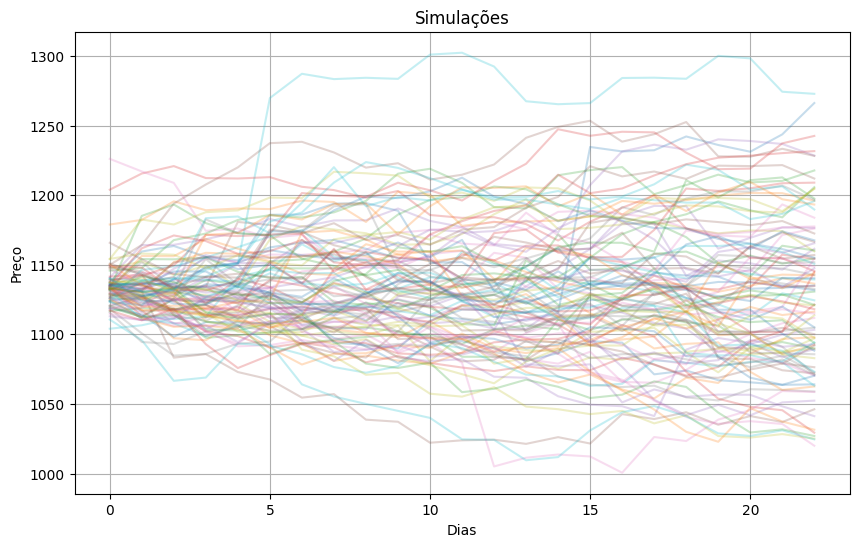

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, alpha=0.25)
plt.title('Simulações')
plt.xlabel('Dias')
plt.ylabel('Preço')
plt.grid()
plt.show()

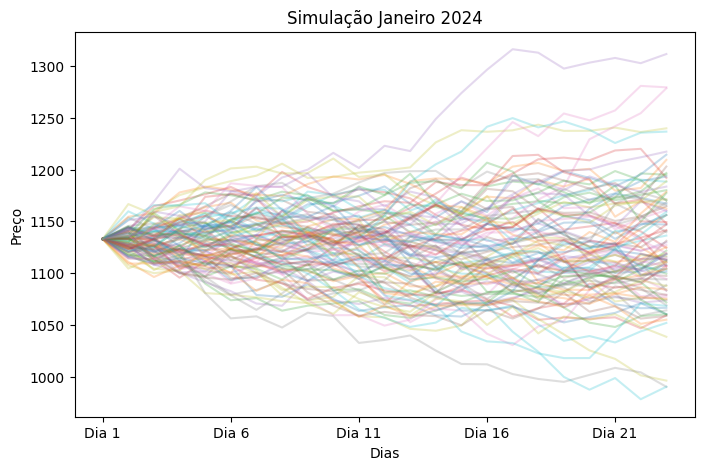

In [117]:
plt.figure(figsize=(8, 5))
plt.plot(price_list, alpha=0.25)
plt.title('Simulação Janeiro 2024')
plt.xlabel('Dias')
plt.ylabel('Preço')
plt.xticks(ticks=np.arange(0, num_days, 5),
           labels=[f'Dia {i+1}' for i in range(0, num_days, 5)])
plt.show()

In [118]:
expected_prices = np.mean(price_list, axis=1)
for day, price in enumerate(expected_prices, start=1):
    print(f'Preço esperado no dia {day}: ${price:.2f}')

Preço esperado no dia 1: $1132.99
Preço esperado no dia 2: $1131.51
Preço esperado no dia 3: $1131.08
Preço esperado no dia 4: $1131.76
Preço esperado no dia 5: $1130.84
Preço esperado no dia 6: $1131.22
Preço esperado no dia 7: $1131.41
Preço esperado no dia 8: $1130.52
Preço esperado no dia 9: $1129.95
Preço esperado no dia 10: $1127.61
Preço esperado no dia 11: $1126.05
Preço esperado no dia 12: $1123.10
Preço esperado no dia 13: $1121.42
Preço esperado no dia 14: $1121.47
Preço esperado no dia 15: $1121.25
Preço esperado no dia 16: $1123.30
Preço esperado no dia 17: $1125.02
Preço esperado no dia 18: $1124.45
Preço esperado no dia 19: $1123.95
Preço esperado no dia 20: $1123.92
Preço esperado no dia 21: $1125.05
Preço esperado no dia 22: $1125.08
Preço esperado no dia 23: $1127.47


**Modelo de Markowitz**

Média dos retornos:
Open      2.534540e+03
High      2.548398e+03
Low       2.519737e+03
Close     2.535092e+03
Volume    2.179311e+09
dtype: float64

Matriz de covariância:
                Open          High           Low         Close        Volume
Open    1.145709e+06  1.152382e+06  1.138521e+06  1.145554e+06  7.442547e+10
High    1.152382e+06  1.159328e+06  1.145210e+06  1.152484e+06  7.719384e+10
Low     1.138521e+06  1.145210e+06  1.131722e+06  1.138700e+06  6.985238e+10
Close   1.145554e+06  1.152484e+06  1.138700e+06  1.146006e+06  7.323778e+10
Volume  7.442547e+10  7.719384e+10  6.985238e+10  7.323778e+10  2.844843e+17

Matriz de covariância encolhida:
[[1.45676274e+33 4.02150946e+20 3.63904218e+20 3.81541089e+20
  1.48207816e+27]
 [4.02150946e+20 1.45676274e+33 3.77440351e+20 3.95733260e+20
  1.53720697e+27]
 [3.63904218e+20 3.77440351e+20 1.45676274e+33 3.58096890e+20
  1.39101029e+27]
 [3.81541089e+20 3.95733260e+20 3.58096890e+20 1.45676274e+33
  1.45842657e+27]
 [1.482078

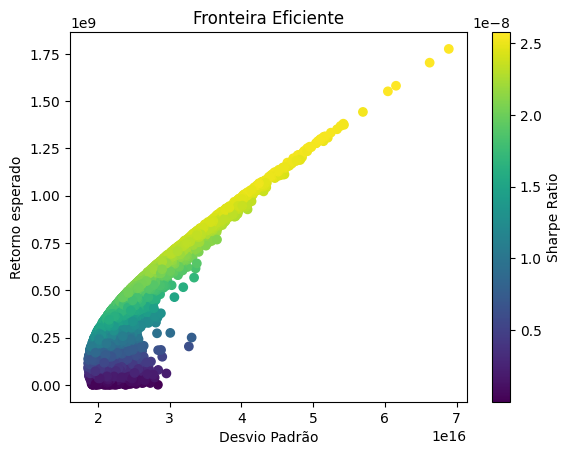

In [131]:
from scipy.optimize import minimize
from sklearn.covariance import LedoitWolf

returns = df
mean_returns = returns.mean()
cov_matrix = returns.cov()
# Shrinkage (Ledoit-Wolf)
lw = LedoitWolf()
cov_matrix_shrinked = lw.fit(cov_matrix).covariance_

print("Média dos retornos:")
print(mean_returns)
print("\nMatriz de covariância:")
print(cov_matrix)
print("\nMatriz de covariância encolhida:")
print(cov_matrix_shrinked)

def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_stddev

def negative_sharpe(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    portfolio_return, portfolio_stddev = portfolio_performance(weights, mean_returns, cov_matrix)
    return - (portfolio_return - risk_free_rate) / portfolio_stddev

def optimize_portfolio(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # soma pesos = 1
    bounds = tuple((0, 0.1) for asset in range(num_assets))  # limite 10% para cada ativo
    result = minimize(negative_sharpe, num_assets * [1. / num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

optimal_weights = optimize_portfolio(mean_returns, cov_matrix_shrinked)

print("Pesos ótimos:", optimal_weights.x)
optimal_return, optimal_stddev = portfolio_performance(optimal_weights.x, mean_returns, cov_matrix_shrinked)
print("Retorno esperado:", optimal_return)
print("Desvio Padrão:", optimal_stddev)

risk_free_rate = 0.01  # 1% ao ano
# Retorno Médio e Volatilidade (anual)
mean_return = returns.mean() * 252
volatility = returns.std() * np.sqrt(252)
sharpe_ratio = (mean_return - risk_free_rate) / volatility
print("Sharpe Ratio:", sharpe_ratio)

def plot_efficient_frontier(mean_returns, cov_matrix):
    results = []
    num_assets = len(mean_returns)
    for _ in range(10000):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        portfolio_return, portfolio_stddev = portfolio_performance(weights, mean_returns, cov_matrix)
        results.append((portfolio_return, portfolio_stddev))
    results = np.array(results)
    plt.scatter(results[:, 1], results[:, 0], c=results[:, 0] / results[:, 1], marker='o')
    plt.xlabel('Desvio Padrão')
    plt.ylabel('Retorno esperado')
    plt.title('Fronteira Eficiente')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

plot_efficient_frontier(mean_returns, cov_matrix_shrinked)

In [1]:
'''
# Cálculo do Retorno Cumulativo
df['Cumulative Return'] = (1 + df['Retorno']).cumprod() - 1

#Sharpe Ratio
taxa_livre_risco = 0.06/252  # Taxa livre de risco diária (ex: 6% ano)
retorno_medio = df['Retorno'].mean()
desvio_padrao = df['Retorno'].std()
sharpe_ratio = (retorno_medio - taxa_livre_risco) / desvio_padrao

#Drawdown
df['Peak'] = df['Cumulative Return'].cummax()
df['Drawdown'] = df['Cumulative Return'] - df['Peak']
df['Max Drawdown'] = df['Drawdown'].min()

print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Retorno Cumulativo: {df['Cumulative Return'].iloc[-1]:.4f}")
print(f"Máximo Drawdown: {df['Max Drawdown'].iloc[-1]:.4f}")

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['Cumulative Return'], label='Retorno Cumulativo', color='blue')
plt.title('Retorno Cumulativo do Portfólio')
plt.xlabel('Data')
plt.ylabel('Retorno Cumulativo')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.legend()


plt.subplot(2, 1, 2)
plt.fill_between(df.index, df['Drawdown'], color='red', alpha=0.5)
plt.title('Drawdown do Portfólio')
plt.xlabel('Data')
plt.ylabel('Drawdown')
plt.axhline(0, color='black', lw=0.5, ls='--')

plt.tight_layout()
plt.show()
'''


'\n# Cálculo do Retorno Cumulativo\ndf[\'Cumulative Return\'] = (1 + df[\'Retorno\']).cumprod() - 1\n\n#Sharpe Ratio\ntaxa_livre_risco = 0.06/252  # Taxa livre de risco diária (ex: 6% ano)\nretorno_medio = df[\'Retorno\'].mean()\ndesvio_padrao = df[\'Retorno\'].std()\nsharpe_ratio = (retorno_medio - taxa_livre_risco) / desvio_padrao\n\n#Drawdown\ndf[\'Peak\'] = df[\'Cumulative Return\'].cummax()\ndf[\'Drawdown\'] = df[\'Cumulative Return\'] - df[\'Peak\']\ndf[\'Max Drawdown\'] = df[\'Drawdown\'].min()\n\nprint(f"Sharpe Ratio: {sharpe_ratio:.4f}")\nprint(f"Retorno Cumulativo: {df[\'Cumulative Return\'].iloc[-1]:.4f}")\nprint(f"Máximo Drawdown: {df[\'Max Drawdown\'].iloc[-1]:.4f}")\n\nplt.figure(figsize=(14, 7))\n\nplt.subplot(2, 1, 1)\nplt.plot(df.index, df[\'Cumulative Return\'], label=\'Retorno Cumulativo\', color=\'blue\')\nplt.title(\'Retorno Cumulativo do Portfólio\')\nplt.xlabel(\'Data\')\nplt.ylabel(\'Retorno Cumulativo\')\nplt.axhline(0, color=\'black\', lw=0.5, ls=\'--\')\nplt.